In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/30-days-of-ml/sample_submission.csv
/kaggle/input/30-days-of-ml/train.csv
/kaggle/input/30-days-of-ml/test.csv


## Import neccessary libraries

In [2]:
# Familiar imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# For ordinal encoding categorical variables, splitting data
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# For training random forest model
from sklearn.ensemble import RandomForestRegressor
# for RMESE -> rms = mean_squared_error(y_actual, y_predicted, squared=False)
from sklearn.metrics import mean_squared_error

## Load Data set

In [3]:
# Load data
train = pd.read_csv("/kaggle/input/30-days-of-ml/train.csv", index_col = 0 )
test = pd.read_csv("/kaggle/input/30-days-of-ml/test.csv", index_col = 0)
print("Import has been completed")

Import has been completed


In [4]:
# Preview data
train.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,
1,B,B,B,C,B,B,A,E,C,N,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
2,B,B,A,A,B,D,A,F,A,O,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
3,A,A,A,C,B,D,A,D,A,F,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
4,B,B,A,C,B,D,A,E,C,K,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
6,A,A,A,C,B,D,A,E,A,N,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


## EDA (Exploratory Data Analysis)

In [5]:
# Statistical description of train data set
train.describe(percentiles= [0.1, 0.25, 0.5, 0.75, 0.9 ]).T

,count,mean,std,min,10%,25%,50%,75%,90%,max
cont0,300000.0,0.527335,0.230599,-0.118039,0.254242,0.405965,0.497053,0.668060,0.871943,1.058443
cont1,300000.0,0.460926,0.214003,-0.069309,0.242940,0.310494,0.427903,0.615113,0.789630,0.887253
cont2,300000.0,0.490498,0.253346,-0.056104,0.182464,0.300604,0.502462,0.647512,0.848327,1.034704
cont3,300000.0,0.496689,0.219199,0.130676,0.219944,0.329783,0.465026,0.664451,0.796854,1.039560
cont4,300000.0,0.491654,0.240074,0.255908,0.276352,0.284188,0.390470,0.696599,0.876275,1.055424
cont5,300000.0,0.510526,0.228232,0.045915,0.251022,0.354141,0.488865,0.669625,0.828467,1.067649
cont6,300000.0,0.467476,0.210331,-0.224689,0.245036,0.342873,0.429383,0.573383,0.766758,1.111552
cont7,300000.0,0.537119,0.218140,0.203763,0.284645,0.355825,0.504661,0.703441,0.868613,1.032837
cont8,300000.0,0.498456,0.239920,-0.260275,0.264466,0.332486,0.439151,0.606056,0.909264,1.040229
cont9,300000.0,0.474872,0.218007,0.117896,0.198457,0.306874,0.434620,0.614333,0.819239,0.982922


In [6]:
# Check missing values in both dataset
# Both dataset don't have missing value
missing_train = pd.DataFrame(train.isna().sum(), columns= ["missing_values_train"])
missing_test = pd.DataFrame(test.isna().sum(), columns= ['missing_values_test'])
pd.concat([missing_train, missing_test], axis= 1)

,missing_values_train,missing_values_test
cat0,0,0.0
cat1,0,0.0
cat2,0,0.0
cat3,0,0.0
cat4,0,0.0
cat5,0,0.0
cat6,0,0.0
cat7,0,0.0
cat8,0,0.0
cat9,0,0.0


In [7]:
print('Rows and Columns in train dataset:', train.shape)
print('Rows and Columns in test dataset:', test.shape)

Rows and Columns in train dataset: (300000, 25)
Rows and Columns in test dataset: (200000, 24)


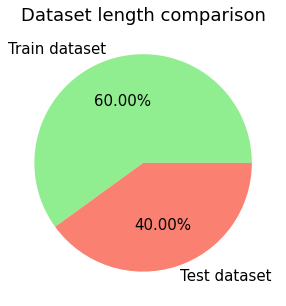

In [8]:
 # Size comparison between Train and Test dataset
fig, ax = plt.subplots(figsize = (5,5))
pie = ax.pie([len(train), len(test)],
               labels= ["Train dataset", "Test dataset"],
               colors= ["lightgreen", "salmon"],
               textprops={"fontsize": 15},
               autopct='%1.2f%%'
               )
#ax.axis("equal")
ax.set_title("Dataset length comparison", fontsize = 18)
fig.set_facecolor("white")
plt.show()

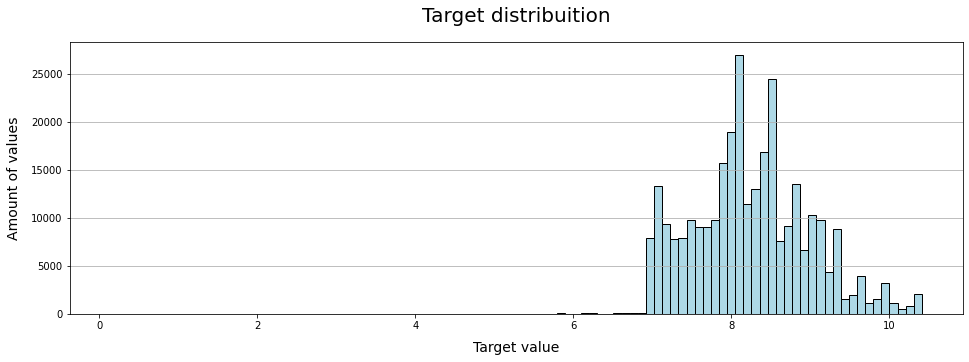

In [9]:
fig, ax = plt.subplots(figsize = (16, 5))
bars = ax.hist(train['target'],
        bins= 100,
        color = "lightblue",
        edgecolor = "black"
        )
ax.set_title("Target distribuition", fontsize=20, pad=20 )
ax.set_ylabel("Amount of values", fontsize = 14, labelpad = 10)
ax.set_xlabel("Target value", fontsize = 14, labelpad = 10)
#ax.margins(0.025, 0.12)
ax.grid(axis="y")

plt.show()

In [10]:
print(f"Target values are less than 5  : {(train['target'] < 5).sum()/len(train) *100 :.3f}%")

Target values are less than 5  : 0.059%


In [11]:
cat_features = [feature for feature in train.columns if 'cat' in feature]
cont_features = [feature for feature in train.columns if 'cont' in feature]

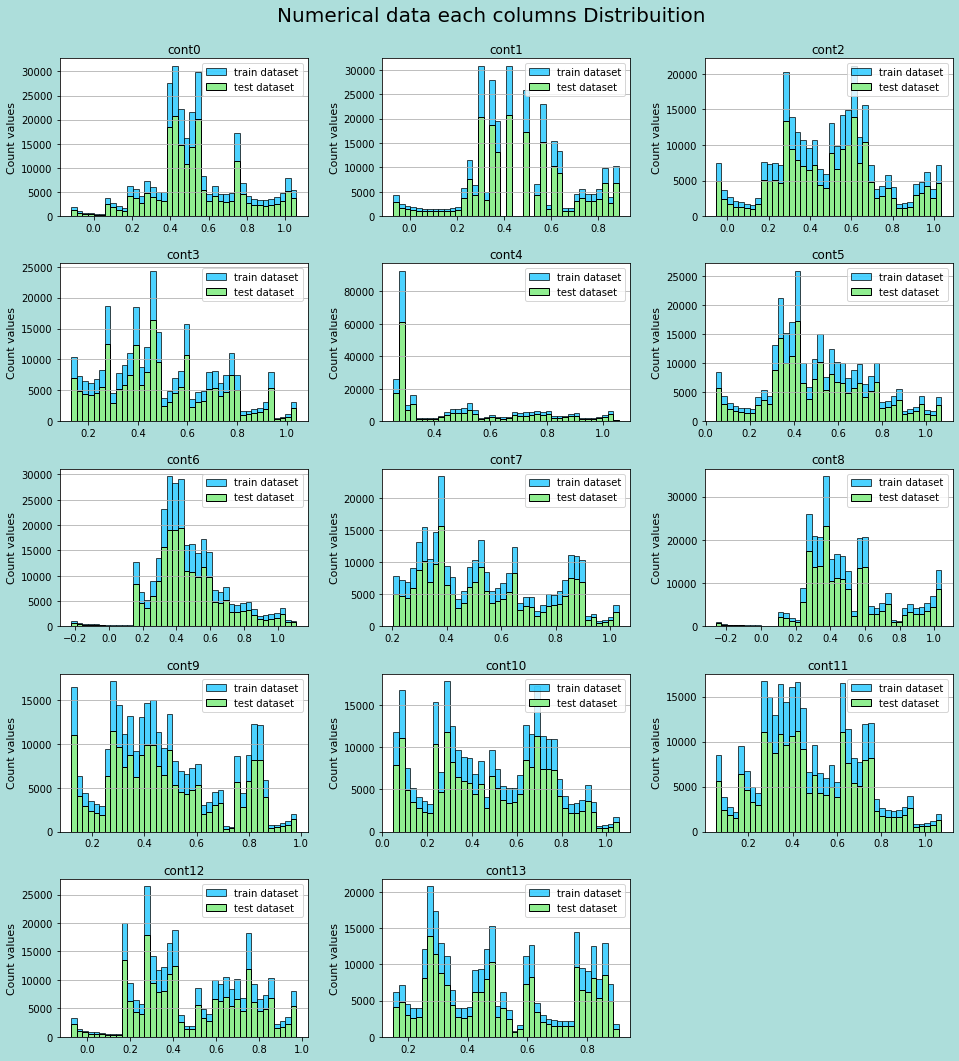

In [12]:
# Combine dataframe containing numerical only
df = pd.concat([train[cont_features], test[cont_features]], axis=0)
columns = df.columns.values

# Calculating required amount rows and columns to display all features plot
cols = 3
rows = len(columns) // cols +1 

fig, axs = plt.subplots(ncols = cols, nrows = rows, figsize = (16, 18))

# Addjust space between plot
plt.subplots_adjust(hspace= 0.3, wspace = 0.3)

# Plot 
i = 0
for r in np.arange(0, rows, 1) :
    for c in np.arange(0, cols, 1) : 
        if i >= len(columns):
            axs[r, c].set_visible(False) # Don't display plot when no more data
        else :
            # Train data histrogram 
            hist1 = axs[r, c].hist(train[columns[i]].values,
                                   range = (df[columns[i]].min(),
                                            df[columns[i]].max()),
                                   bins = 40,
                                   color = 'deepskyblue',
                                   edgecolor = "black",
                                   alpha = 0.7,
                                   label = "train dataset" ) 
            
            # Test data histrogram 
            hist2 = axs[r, c].hist(test[columns[i]].values,
                                   range =(df[columns[i]].min(),
                                           df[columns[i]].max()),
                                    bins = 40,
                                    color = "lightgreen",
                                    alpha = 1.0,
                                    edgecolor = "black",
                                    label = "test dataset"
                                   )
            axs[r, c].set_title(columns[i], fontsize = 12, pad= 5)
            axs[r, c].legend(fontsize = 10)
            axs[r, c].set_ylabel('Count values', fontsize = 11)
            #axs[r, c].tick_params(axis = "y", labelsize = 13)
            #axs[r, c].tick_params(axis = "x", labelsize = 13)
            fig.set_facecolor("#addedb")
            axs[r, c].grid(axis = "y")
        i+=1
plt.suptitle("Numerical data each columns Distribuition", fontsize = 20, y = 0.92)
plt.show()

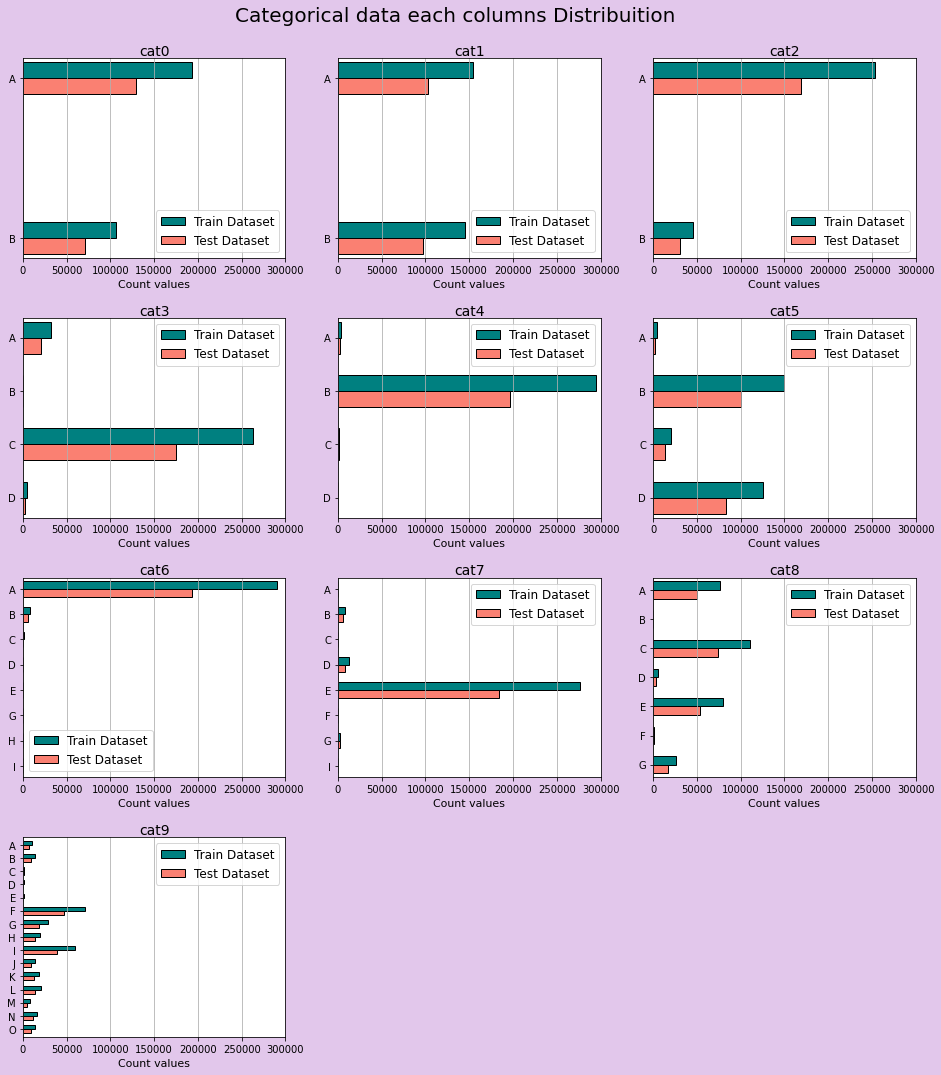

In [13]:
# Combine dataframe containing categorical only
df = pd.concat([train[cat_features], test[cat_features]], axis = 0)
columns = df.columns.values
# Calculating required amount rows and columns to display all features plot
cols = 3
rows = len(columns) // cols +1 

fig, axs = plt.subplots(ncols = cols, nrows = rows, figsize = (16, 18), sharex= False)

# Addjust space between plot
plt.subplots_adjust(hspace= 0.3, wspace= 0.2)

i = 0
for r in np.arange(0, rows, 1):
    for c in np.arange(0, cols, 1):
        if i  >= len(cat_features):
            axs[r, c].set_visible(False)
        
        else: 
            values = df[cat_features[i]].value_counts().sort_index(ascending = False).index
            bars_pos = np.arange(0, len(values))
            if len(values) <4: 
                height = 0.1
            else :
                height = 0.3

            bars1 = axs[r, c].barh(bars_pos+height/2, # set y position 
                                   [train[train[cat_features[i]]==x][cat_features[i]].count() for x in values], # set x values
                                   height=height,
                                   color="teal",
                                   edgecolor="black",
                                   label="Train Dataset")
            bars2 = axs[r, c].barh(
                                   bars_pos-height/2,
                                   [test[test[cat_features[i]]==x][cat_features[i]].count() for x in values],
                                   height=height,
                                   color="salmon",
                                   edgecolor="black",
                                   label="Test Dataset")
                                   
            y_labels = [str(x) for x in values]
            axs[r,c].set_title(cat_features[i], fontsize = 14, pad =1)
            axs[r, c].set_xlim(0, len(train))
            axs[r, c].set_yticks(bars_pos)
            axs[r, c].set_yticklabels(y_labels)
            axs[r, c].set_xlabel('Count values', fontsize = 11)
            axs[r, c].tick_params(axis = "x", labelsize = 10)
            axs[r, c].tick_params(axis = "y", labelsize = 10)
            axs[r, c].grid(axis = "x")
            axs[r, c].legend(fontsize = 12)
            axs[r,c].margins(0.1, 0.02)
            fig.set_facecolor("#e2c7eb")


        i +=1
plt.suptitle("Categorical data each columns Distribuition", fontsize = 20, y = 0.92)
plt.show()

In [14]:
# Check amount of unique category in each columns between train and test datasets are same.
x = pd.DataFrame(train[cat_features].T.apply(lambda x: x.nunique(), axis=1), columns = ['count_cat_train']) # T is transpose
y = pd.DataFrame(test[cat_features].T.apply(lambda x: x.nunique(), axis=1), columns = ['count_cat_test'])

#Check values in each columns between 2 datasets are same or not?
z = []
for col in cat_features:
       z.append(set(train[col].value_counts().index) == set(test[col].value_counts().index) )

z = pd.DataFrame(z, cat_features, columns = ["values_same"])

pd.concat([x, y, z], axis=1)

,count_cat_train,count_cat_test,values_same
cat0,2,2,True
cat1,2,2,True
cat2,2,2,True
cat3,4,4,True
cat4,4,4,True
cat5,4,4,True
cat6,8,8,True
cat7,8,8,True
cat8,7,7,True
cat9,15,15,True


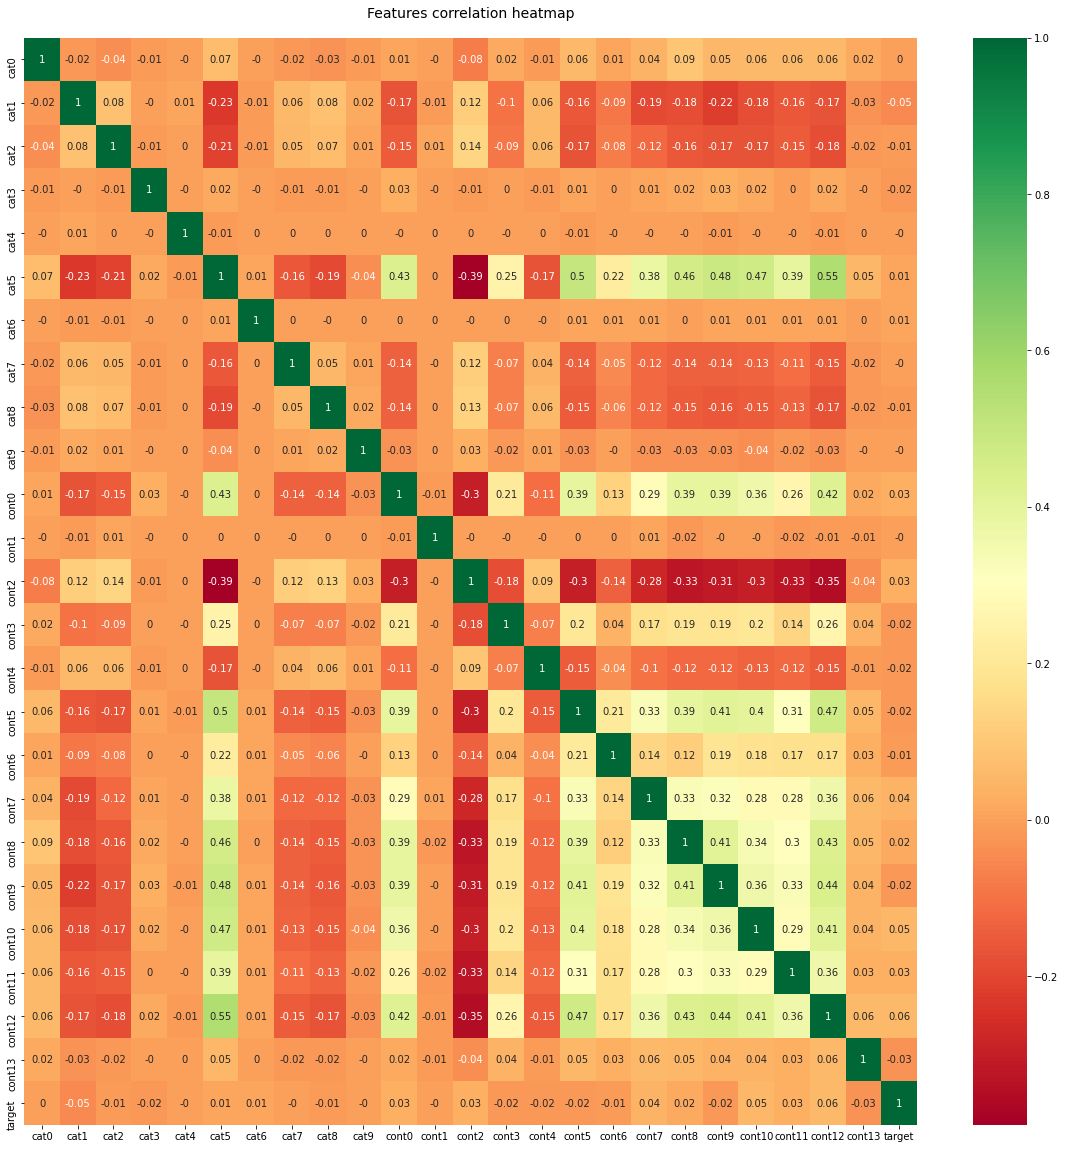

In [15]:
#Find correlation between all features and target
df1 = train.copy()

for col in cat_features:
    encoder = OrdinalEncoder()
    df1[col] = encoder.fit_transform(np.array(df1[col]).reshape(-1, 1)) #  -1 mean number of last row in dataset, 1 mean 1 column. 

## Correlation
#get correlations of each features in dataset
corrmat = df1.corr().round(2)
plt.figure(figsize=(20,20))
#plot heat map
ax=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

ax.set_title("Features correlation heatmap", fontsize = 14, pad = 20)

plt.show()

## Data Preprocessing

In [16]:
# Ordinal category data
X = train.drop(["target"], axis =1)
encoder = OrdinalEncoder()
X[cat_features] = encoder.fit_transform(X[cat_features])
test[cat_features] = encoder.fit_transform(test[cat_features])
y = train["target"]

#drop Cat4 because it have least variance
#X = X.drop(["cat4"], axis =1)
#test = test.drop(["cat4"], axis= 1)

In [17]:
'''# List of categorical columns
object_cols = [col for col in features.columns if 'cat' in col]
# can use this code too.
#cat_col = features.select_dtypes(include=['object']).columns

# ordinal-encode categorical columns
#ordinal_encoder = OrdinalEncoder()

# Make dummy before edit
X= features.copy()
X_test = test.copy()

# Seperate continuous Data
cont_X = X.drop(object_cols, axis = 1)
cont_X = cont_X.reset_index(drop = True) # drop = True mean first column is droped.
col_con = cont_X.columns # Extract columns name list

# Seperate continuous  Test Data

cont_X_test = X_test.drop(object_cols, axis= 1)
cont_X_test = cont_X_test.reset_index(drop = True)
col_con_test = cont_X_test.columns

# Modified continuous data by use Normalization method.
#normalizer = preprocessing.Normalization(axis= -1) #tensorflow
#normalizer.adapt(np.array(cont_X))
#cont_X = pd.DataFrame(normalizer(cont_X).numpy(),columns=col_con)
scale = StandardScaler()
cont_X = pd.DataFrame(scale.fit_transform(cont_X), columns=col_con)
cont_X_test = pd.DataFrame(scale.transform(cont_X_test), columns= col_con_test)

# Modified categorical data by use Onehot Encoder method.
onehot_encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
obj_X= pd.DataFrame(onehot_encoder.fit_transform(features[object_cols]))
obj_X_test = pd.DataFrame(onehot_encoder.transform(test[object_cols]))

# Concatenate both data types after modified.
OH_X = pd.concat([obj_X, cont_X], axis = 1)
OH_X_test = pd.concat([obj_X_test, cont_X_test], axis= 1)
'''

"# List of categorical columns\nobject_cols = [col for col in features.columns if 'cat' in col]\n# can use this code too.\n#cat_col = features.select_dtypes(include=['object']).columns\n\n# ordinal-encode categorical columns\n#ordinal_encoder = OrdinalEncoder()\n\n# Make dummy before edit\nX= features.copy()\nX_test = test.copy()\n\n# Seperate continuous Data\ncont_X = X.drop(object_cols, axis = 1)\ncont_X = cont_X.reset_index(drop = True) # drop = True mean first column is droped.\ncol_con = cont_X.columns # Extract columns name list\n\n# Seperate continuous  Test Data\n\ncont_X_test = X_test.drop(object_cols, axis= 1)\ncont_X_test = cont_X_test.reset_index(drop = True)\ncol_con_test = cont_X_test.columns\n\n# Modified continuous data by use Normalization method.\n#normalizer = preprocessing.Normalization(axis= -1) #tensorflow\n#normalizer.adapt(np.array(cont_X))\n#cont_X = pd.DataFrame(normalizer(cont_X).numpy(),columns=col_con)\nscale = StandardScaler()\ncont_X = pd.DataFrame(scale.

Split data for validations

In [18]:
#X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.8, test_size = 0.2 ,random_state=0)

## Run model

In [19]:
'''rf = RandomForestRegressor(random_state= 0)
rf.fit(X_train, y_train)
pred_val = rf.predict(X_valid)
print("RMSE : ", mean_squared_error(pred_val, y_valid, squared = False) )'''

'rf = RandomForestRegressor(random_state= 0)\nrf.fit(X_train, y_train)\npred_val = rf.predict(X_valid)\nprint("RMSE : ", mean_squared_error(pred_val, y_valid, squared = False) )'

In [20]:
# Create class Model
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

class Blend_model:
    def __init__(self):
#         Create first model
        
        
        self.XGB = XGBRegressor(n_estimators= 10000,
                                learning_rate = 0.35,
                                subsample = 0.926,
                                colsample_bytree = 0.84,
                                max_depth = 2,
                                booster = 'gbtree', 
                                reg_lambda = 35.1,
                                reg_alpha = 34.9,
                                random_state = 42,
                                n_jobs = 4)
        
    #         Create second model
        self.cat  = CatBoostRegressor  (iterations = 1600,
                                        learning_rate = 0.024,
                                        l2_leaf_reg = 20,
                                        random_strength = 1.5,
                                        grow_policy = 'Depthwise',
                                        leaf_estimation_method = 'Newton', 
                                        bootstrap_type = 'Bernoulli',
                                        thread_count = 4,
                                        verbose = False,
                                        loss_function = 'RMSE',
                                        eval_metric = 'RMSE',
                                        od_type = 'Iter'
                                       )
        
        #         Create third model
        self.lgbm_model = LGBMRegressor(bagging_fraction=1.0, 
                                        bagging_freq=0, 
                                        feature_fraction=0.4,
                                        feature_pre_filter=False, 
                                        lambda_l1=0.45, 
                                        lambda_l2=4.8,
                                        learning_rate=0.005, 
                                        metric='RMSE', 
                                        min_child_samples=100,
                                        num_leaves=10, 
                                        num_threads=4, 
                                        num_trees=80000)
        
        
    def train(self,X,y,train_size = 0.8, test_size = 0.2):
        X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = train_size, test_size = test_size ,random_state=0)
#         training model
        print("Train XGBRegressor")
        self.XGB.fit(X_train, y_train,
                     early_stopping_rounds =50,
                     eval_set=[(X_valid, y_valid)],
                     verbose=False)
        # tr_XGB = pd.DataFrame(self.XGB.predict(X_train))
        print("Train Catboost")
        self.cat.fit(X_train, y_train)
        # tr_RF = pd.DataFrame(self.RF.predict(X_train))
        print("Train LGBMRegressor")
        self.lgbm_model.fit(X_train, y_train)
        # tr_lgbm_model = pd.DataFrame(self.lgbm_model.predict(X_train))
        
        v_XGB = pd.DataFrame(self.XGB.predict(X_valid))
        v_cat = pd.DataFrame(self.cat.predict(X_valid))
        v_lgbm_model = pd.DataFrame(self.lgbm_model.predict(X_valid))
#  Select best acc model
        st = 100
        acc_all = pd.DataFrame()
        print("Select weight")
        for j in range(0,st+1):
            
            for i in range(0,st+1-j):
                w1 = i/st
                w2 = j/st
                w3 = 1-w1-w2
                pred = (v_cat*w1)+(v_XGB*w2)+(v_lgbm_model*w3)
                pd.DataFrame()
                acc = pd.DataFrame([mean_squared_error(pred, y_valid)**(1/2)],columns=['acc'])
                acc['w1'] = w1
                acc['w2'] = w2
                acc['w3'] = w3
                acc_all = acc_all.append(acc)
        self.acc_all_re = acc_all.reset_index(drop=True)
        print("Finish Train")
    def predict(self,X_Test):
        [[err,w1,w2,w3]] = self.acc_all_re.loc[self.acc_all_re['acc']==self.acc_all_re['acc'].min()].values
        t_XGB = pd.DataFrame(self.XGB.predict(X_Test))
        t_cat = pd.DataFrame(self.cat.predict(X_Test))
        t_lgbm_model = pd.DataFrame(self.lgbm_model.predict(X_Test))
        pred = (t_XGB*w1)+(t_cat*w2)+(t_lgbm_model*w3)
        [predict] = pred.values.transpose()
        return predict

In [21]:
import time
my_model = Blend_model()
t= time.time()
my_model.train(X,y)
print(time.time()-t)

Train XGBRegressor
Train Catboost
Train LGBMRegressor
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=4.8, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.8
[LightGBM] [Warning] lambda_l1 is set=0.45, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.45
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] num_iterations is set=80000, num_trees=80000 will be ignored. Current value: num_iterations=80000
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


Select weight
Finish Train
1744.387446641922


In [22]:
# Use the model to generate predictions
predictions = my_model.predict(test)

# Save the predictions to a CSV file
output = pd.DataFrame({'Id': test.index,
                       'target': predictions})
output.to_csv('submission.csv', index=False)